In [1]:
import numpy as np

In [2]:
# Hyper parameters
m = 2000
n = 2
lr = 0.001
epochs = 10000

In [3]:
def fun(X):
  # since the data is not standardized in the code, the coeffecients are taken 
  # in the range (0, 1)
  return 41 * ( X ** 2) / 53 +  11 * X / 19 + 17 / 23

In [4]:
def create_dataset():
    X = np.random.rand(m, 1)
    X2 = X * X

    Y = fun(X)

    arr = []
    arr.append(X2)
    arr.append(X)

    arr = np.array(arr)
    return arr.reshape((n,m)), Y.reshape((1,m))

In [5]:
x, y = create_dataset()
# x = x.reshape((n, m))
# y = y.reshape((1, m))

In [6]:
w = np.random.rand(n, 1)
b = np.random.rand(1)

In [7]:
def predict(train, weight, bias):
  return np.dot(weight.transpose(), train) + bias

In [8]:
def loss(y, y_hat):
  return np.sum((np.abs(y-y_hat) ** 4)) / m

In [9]:
def derivative(y, y_hat):
  return 4 * ((y_hat - y) ** 3)

In [10]:
losses = []
for i in range(epochs):
  # forward prop
  y_hat = predict(x, w, b)

  # derivative for backprop
  dz =  derivative(y, y_hat)

  # printing loss every 50 epochs
  if i % 500 == 0:
    losses.append(loss(y, y_hat))
    print("Loss at epoch " + str(i+1) + " is " + str(loss(y, y_hat)))

  dw = np.dot(x, dz.transpose()) / m
  db = np.sum(dz) / m

  w -= lr * dw
  b -= lr * db

Loss at epoch 1 is 7.252362683330963e-05
Loss at epoch 501 is 6.763188734153494e-05
Loss at epoch 1001 is 6.325993933317266e-05
Loss at epoch 1501 is 5.933459558659581e-05
Loss at epoch 2001 is 5.5795271208382165e-05
Loss at epoch 2501 is 5.259144935794141e-05
Loss at epoch 3001 is 4.968072453366554e-05
Loss at epoch 3501 is 4.7027277369078635e-05
Loss at epoch 4001 is 4.4600675231459416e-05
Loss at epoch 4501 is 4.2374921231431936e-05
Loss at epoch 5001 is 4.0327694373893374e-05
Loss at epoch 5501 is 3.8439738045458776e-05
Loss at epoch 6001 is 3.6694364544611143e-05
Loss at epoch 6501 is 3.50770510762297e-05
Loss at epoch 7001 is 3.357510834965533e-05
Loss at epoch 7501 is 3.217740719416134e-05
Loss at epoch 8001 is 3.087415182881056e-05
Loss at epoch 8501 is 2.9656690873151143e-05
Loss at epoch 9001 is 2.8517359060788943e-05
Loss at epoch 9501 is 2.7449344064283707e-05


In [11]:
print(w)

[[0.80214977]
 [0.48366893]]


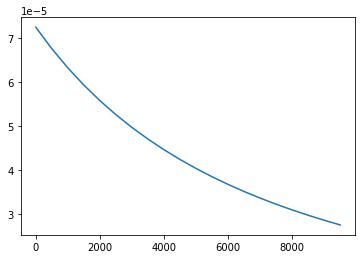

In [12]:
epocs_x = [i for i in range(1, epochs, 500)]
import matplotlib.pyplot as plt
plt.plot(epocs_x, losses)

In [13]:
# create test data for the model
test_x, test_y = create_dataset()

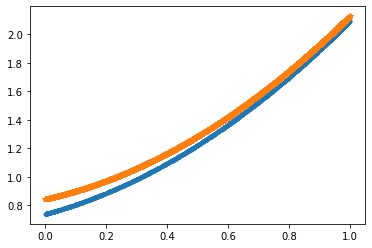

In [14]:
# Plotting the ground truth values vs model predicted values
# Yellow line denotes the predictions, blue line denotes the ground truth
plt.plot(test_x[1], test_y.reshape(m), '.',
         test_x[1], predict(test_x, w, b).reshape(m), '*')